In [67]:
#### Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
 # Reading the csv file
application_data = pd.read_csv(r"C:\Users\shrey\Downloads\application_data (1).csv")
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#shape of the data
application_data.shape

(307511, 122)

In [8]:
#dtypes
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [31]:
#null values in columns with more than or equal to 40% NULL values
null_data_percentage = application_data.isnull().sum()*100/len(application_data)
major_missing_data_columns = null_data_percentage[null_data_percentage>=40]
major_missing_data_columns

Series([], dtype: float64)

In [33]:
#dropping the above columns
application_data_df = application_data.drop(columns=major_missing_data_columns.index)

In [34]:
application_data_df.shape

(307511, 73)

In [49]:
minor_missing_data_columns = null_data_percentage[(null_data_percentage<=15) & (null_data_percentage>0)].sort_values(ascending=False)
minor_missing_data_columns

PRODUCT_COMBINATION    0.112516
AMT_CREDIT             0.000325
dtype: float64

In [61]:
application_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   NAME_CONTRACT_TYPE          307511 non-null  object 
 3   CODE_GENDER                 307511 non-null  object 
 4   FLAG_OWN_CAR                307511 non-null  object 
 5   FLAG_OWN_REALTY             307511 non-null  object 
 6   CNT_CHILDREN                307511 non-null  int64  
 7   AMT_INCOME_TOTAL            307511 non-null  float64
 8   AMT_CREDIT                  307511 non-null  float64
 9   AMT_ANNUITY                 307499 non-null  float64
 10  AMT_GOODS_PRICE             307233 non-null  float64
 11  NAME_TYPE_SUITE             306219 non-null  object 
 12  NAME_INCOME_TYPE            307511 non-null  object 
 13  NAME_EDUCATION

In [62]:
application_data_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,306490.000000,306490.000000,306490.000000,306490.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,1.422245,0.143421,1.405292,0.100049,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,2.400989,0.446698,2.379803,0.362291,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,348.000000,34.000000,344.000000,24.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [63]:
application_data_df.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY            2
REG_CITY_NOT_WORK_CITY             2
FLAG_MOBIL                         2
FLAG_OWN_REALTY                    2
REG_CITY_NOT_LIVE_CITY             2
NAME_CONTRACT_TYPE                 2
TARGET                             2
FLAG_OWN_CAR                       2
CODE_GENDER                        3
AMT_REQ_CREDIT_BUREAU_HOUR         5
NAME_EDUCATION_TYPE                5
NAME_HOUSING_TYPE                  6
NAME_FAMILY_STATUS                 6
NAME_TYPE_SUITE                    7
WEEKDAY_APPR_PROCESS_START         7
NAME_INCOME_TYPE                   8
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
DEF_60_CNT_SOCIAL_CIRCLE           9
DEF_30_CNT_SOCIAL_CIRCLE          10
AMT_REQ_CREDIT_BUREAU_QRT         11
CNT_CHILDREN                      15
CNT_FAM_MEMBERS                   17
OCCUPATION_TYPE                   18
AMT_REQ_CREDIT_BUREAU_MON         24
HOUR_APPR_PROCESS_START           24
AMT_REQ_CREDIT_BUREAU_YEAR        25
O

In [68]:
#Outliers
application_data_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,306490.000000,306490.000000,306490.000000,306490.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,1.422245,0.143421,1.405292,0.100049,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,2.400989,0.446698,2.379803,0.362291,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,348.000000,34.000000,344.000000,24.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


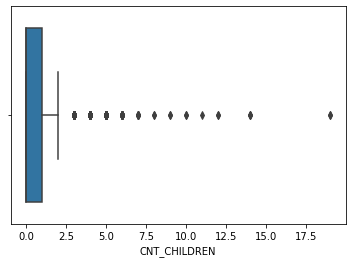

In [69]:
#boxplots
sns.boxplot(application_data_df['CNT_CHILDREN'])
plt.show()
#19 is an outlier

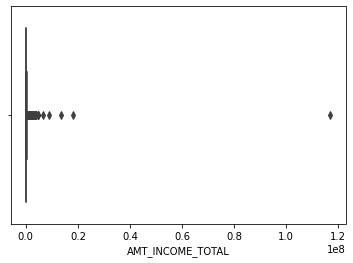

In [70]:
#Boxplot
sns.boxplot(application_data_df['AMT_INCOME_TOTAL'])
plt.show()
#one value is too high

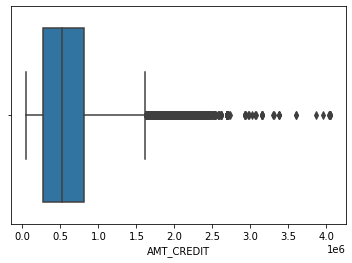

In [71]:
#boxplot
sns.boxplot(application_data_df['AMT_CREDIT'])
plt.show()

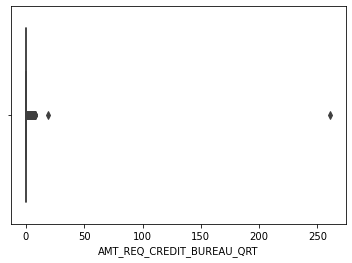

In [74]:
#boxplot
sns.boxplot(application_data_df['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.show() 

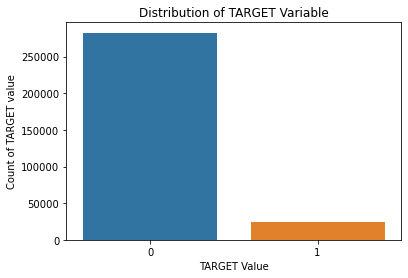

In [77]:
#checking the distribution of target variable
sns.countplot(application_data['TARGET'])
plt.xlabel("TARGET Value")
plt.ylabel("Count of TARGET value")
plt.title("Distribution of TARGET Variable")
plt.show()

In [78]:
# creating new datadrame for target=0
appli_data_target0 = application_data_df[application_data_df['TARGET']==0]
appli_data_target0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [79]:
# creating new datadrame for target=0
appli_data_target1 = application_data_df[application_data_df['TARGET']==1]
appli_data_target1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,10.0,1.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
# to get the ratio of appli_data_target0 : appli_data_target1
ratio = appli_data_target0.shape[0]/appli_data_target1.shape[0]
ratio

11.387150050352467

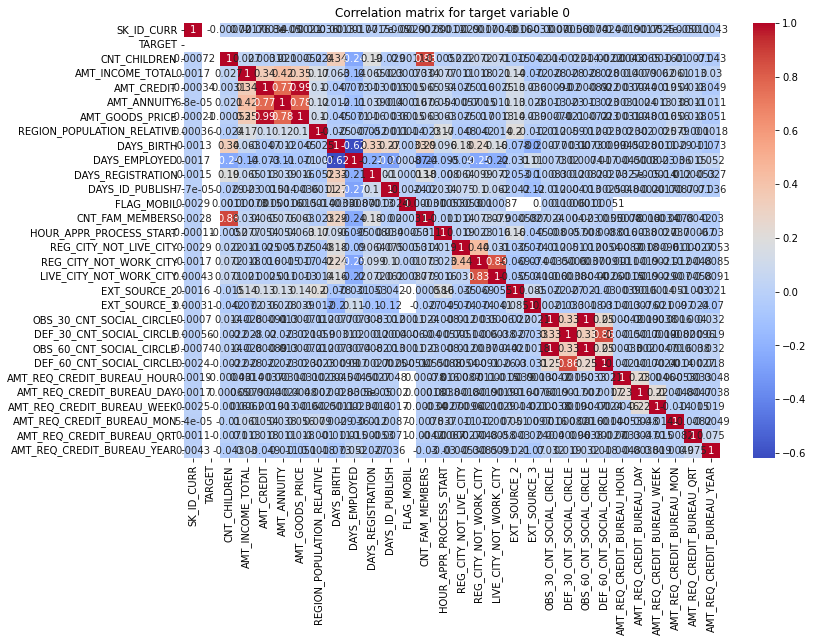

In [86]:
#finding the corelation
# for target variable=0
plt.figure(figsize=(12,8)) 
sns.heatmap(appli_data_target0.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation matrix for target variable 0')
plt.show()

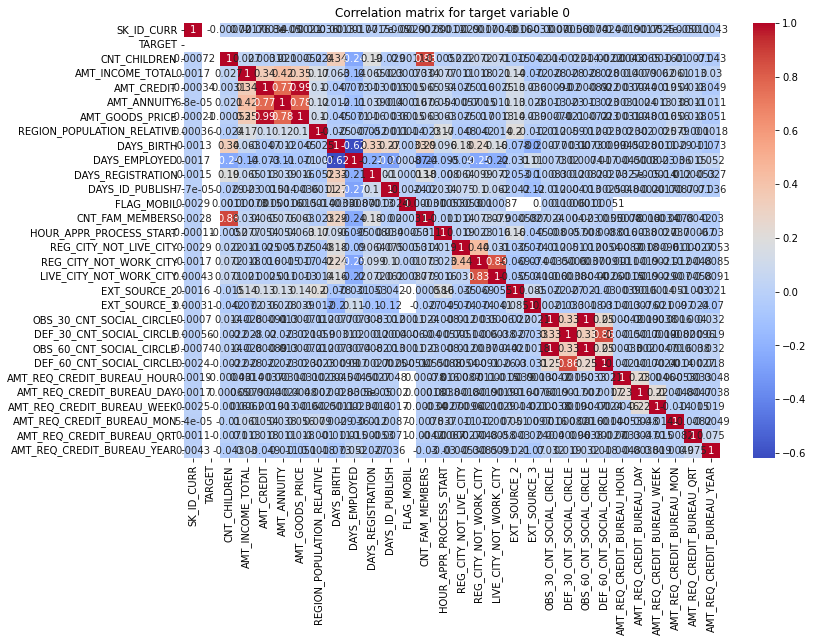

In [88]:
# for target variable=0
plt.figure(figsize=(12,8)) 
sns.heatmap(appli_data_target0.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation matrix for target variable 0')
plt.show()

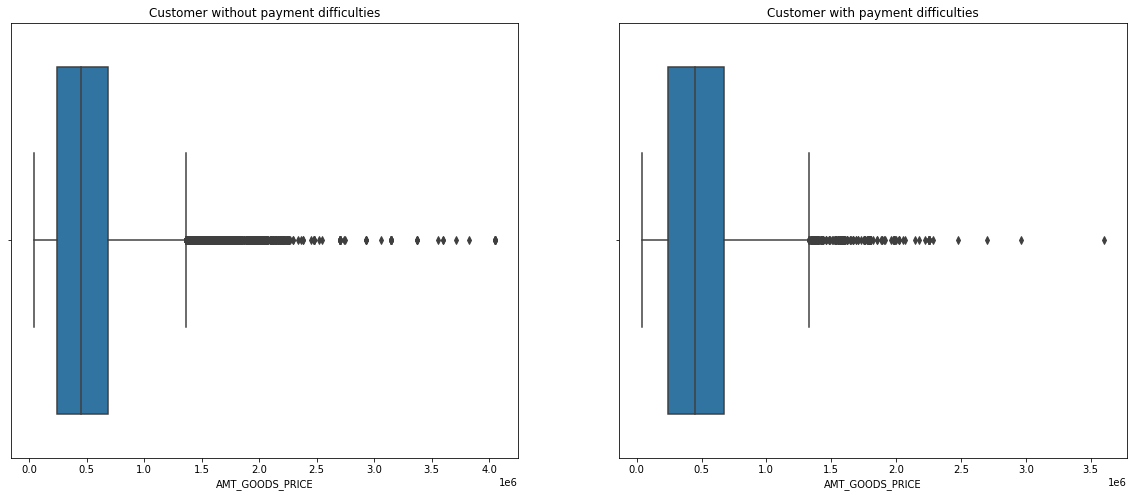

In [90]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(appli_data_target0['AMT_GOODS_PRICE'])
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
ax = sns.boxplot(appli_data_target1['AMT_GOODS_PRICE'])
plt.title('Customer with payment difficulties')
plt.show()


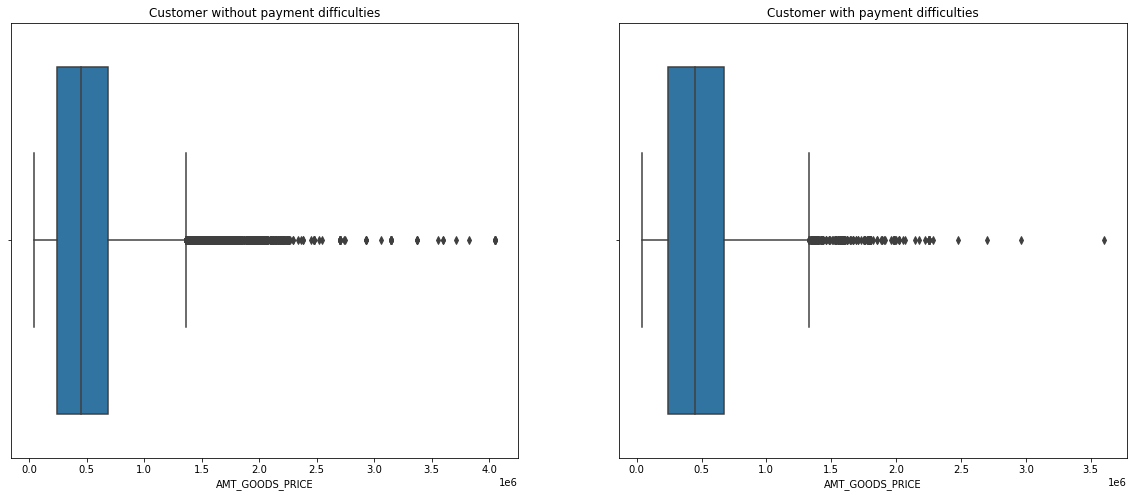

In [92]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(appli_data_target0['AMT_GOODS_PRICE'])
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
ax = sns.boxplot(appli_data_target1['AMT_GOODS_PRICE'])
plt.title('Customer with payment difficulties')
plt.show()

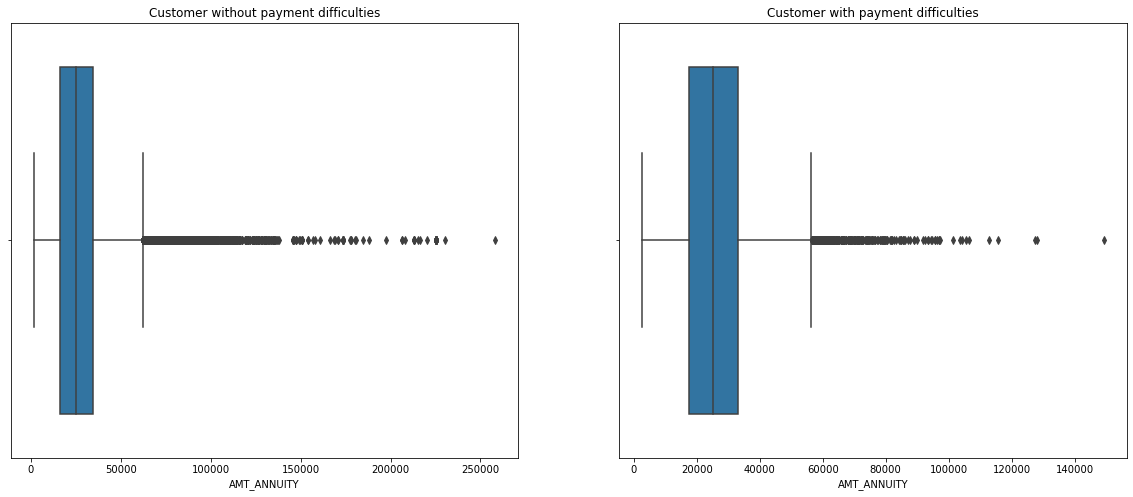

In [94]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(appli_data_target0['AMT_ANNUITY'])
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
ax = sns.boxplot(appli_data_target1['AMT_ANNUITY'])
plt.title('Customer with payment difficulties')
plt.show()

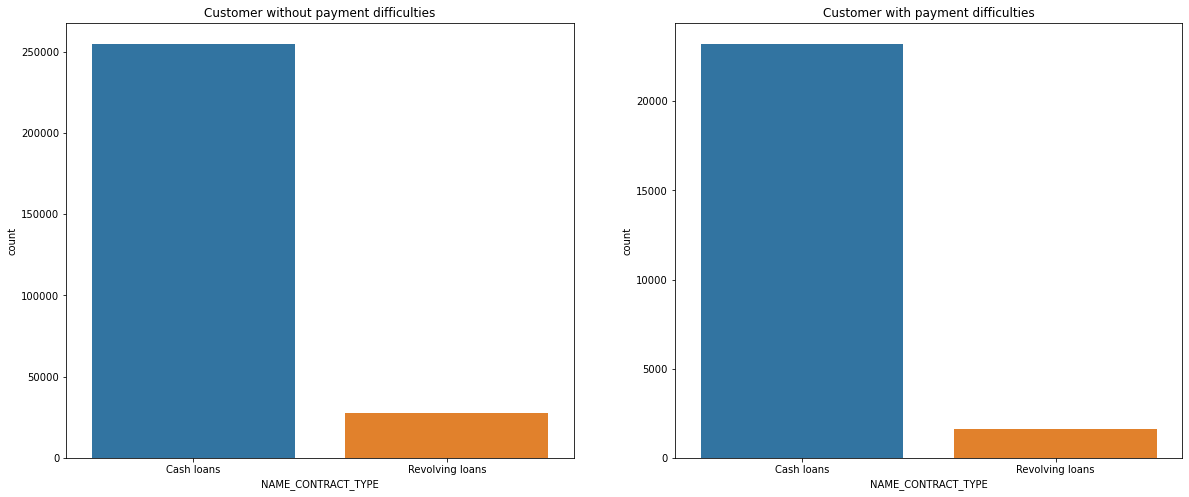

In [95]:
#for categorical variable
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(appli_data_target0['NAME_CONTRACT_TYPE'])
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
ax = sns.countplot(appli_data_target1['NAME_CONTRACT_TYPE'])
plt.title('Customer with payment difficulties')
plt.show()


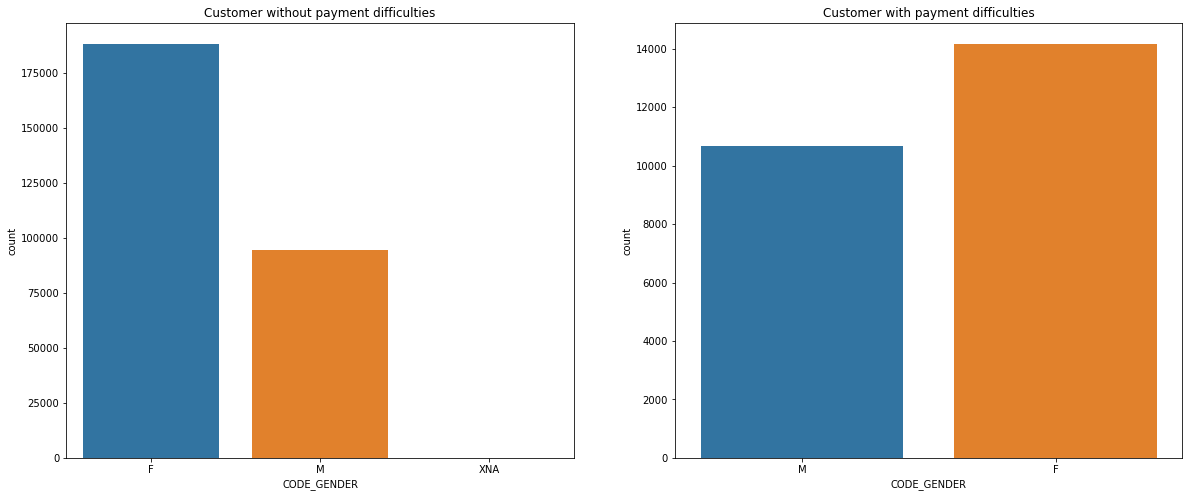

In [96]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(appli_data_target0['CODE_GENDER'])
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
ax = sns.countplot(appli_data_target1['CODE_GENDER'])
plt.title('Customer with payment difficulties')
plt.show()


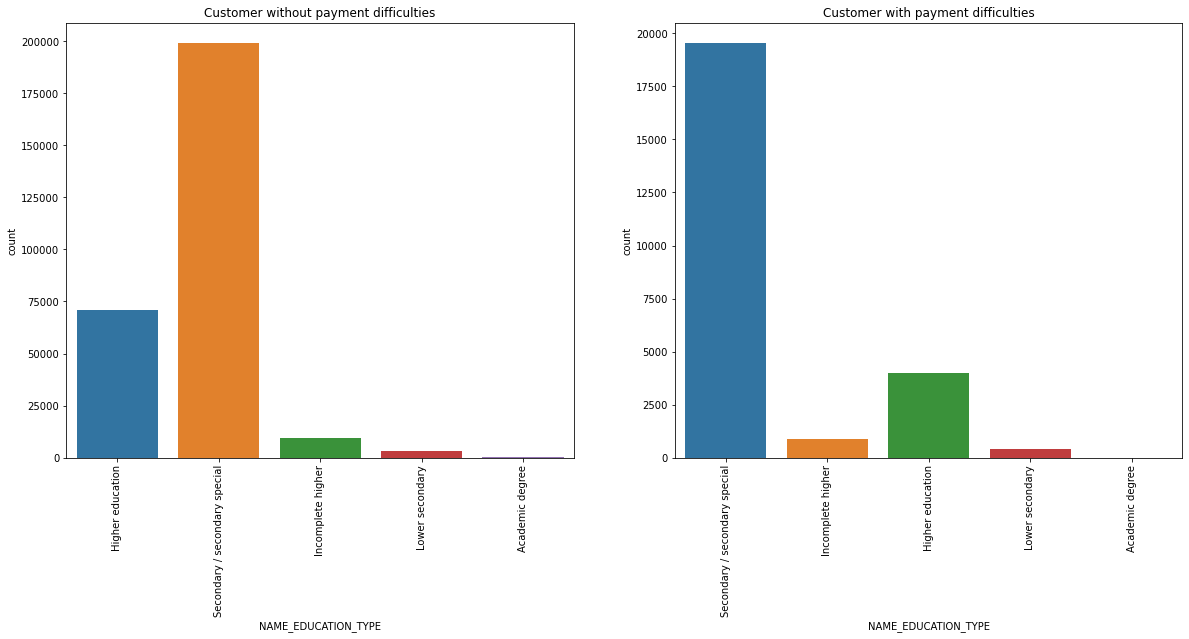

In [97]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(appli_data_target0['NAME_EDUCATION_TYPE'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.countplot(appli_data_target1['NAME_EDUCATION_TYPE'])
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

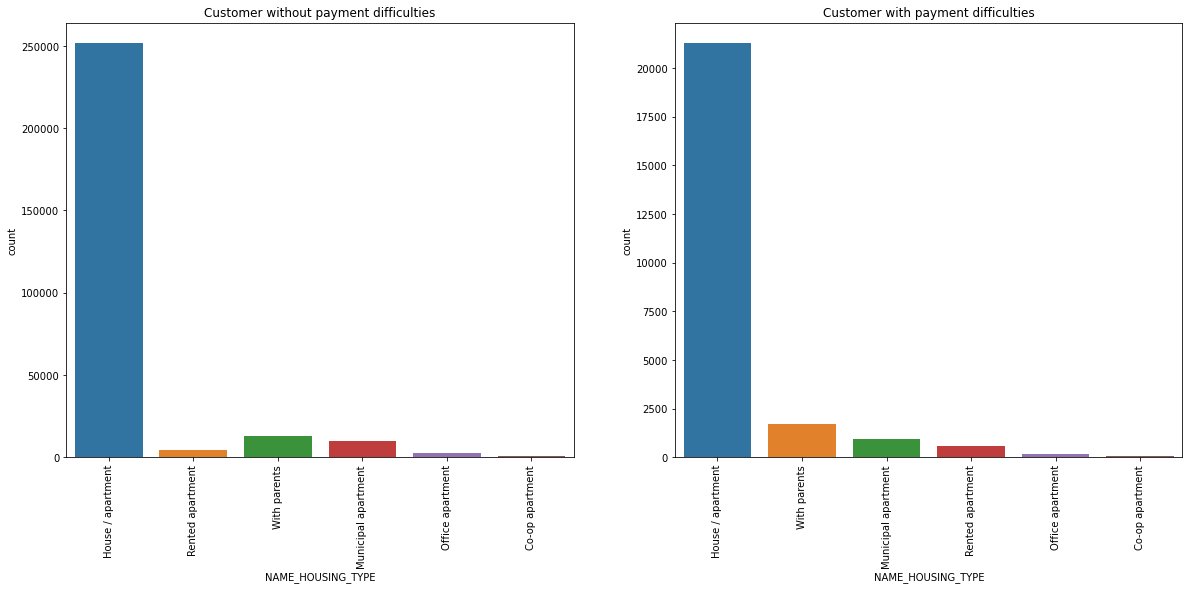

In [98]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(appli_data_target0['NAME_HOUSING_TYPE'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.countplot(appli_data_target1['NAME_HOUSING_TYPE'])
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()


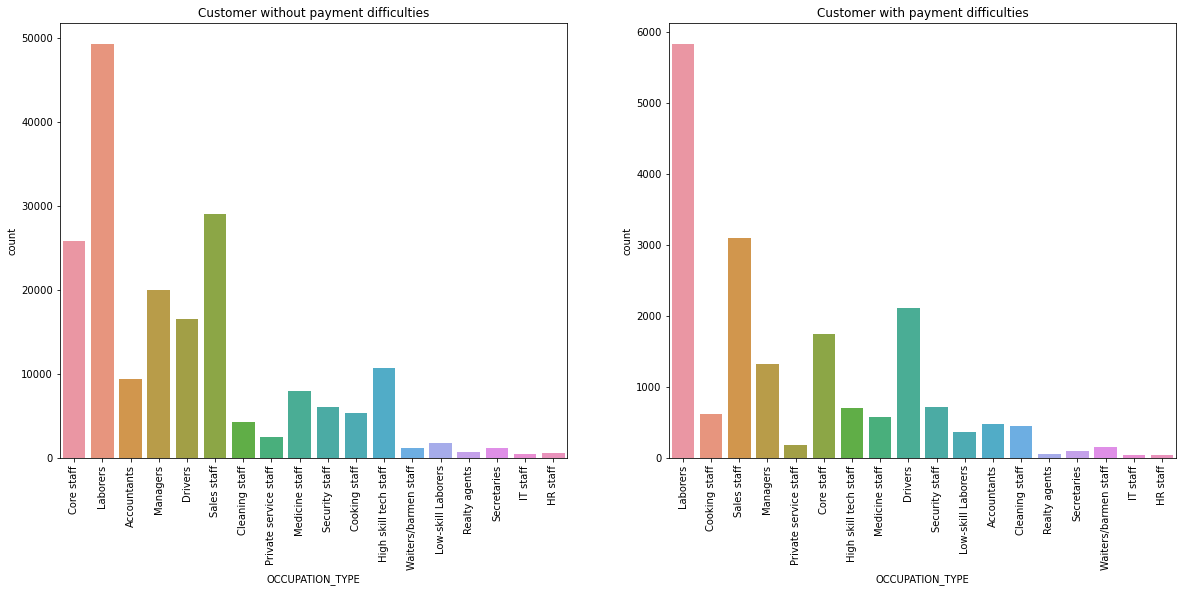

In [99]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.countplot(appli_data_target0['OCCUPATION_TYPE'])
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.countplot(appli_data_target1['OCCUPATION_TYPE'])
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

In [100]:
#bivariate analysis
#Numerical-Numerical bivariate analysis

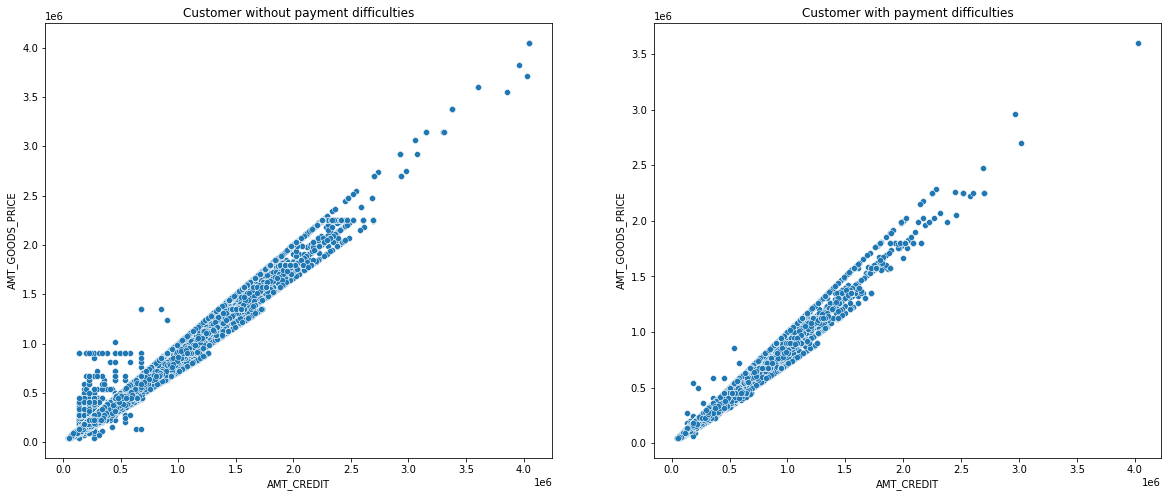

In [102]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.scatterplot(data=appli_data_target0,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Customer without payment difficulties')


plt.subplot(1,2,2)
ax = sns.scatterplot(data=appli_data_target1,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Customer with payment difficulties')

plt.show()

In [103]:
#categorical - categorical bivariate analysis

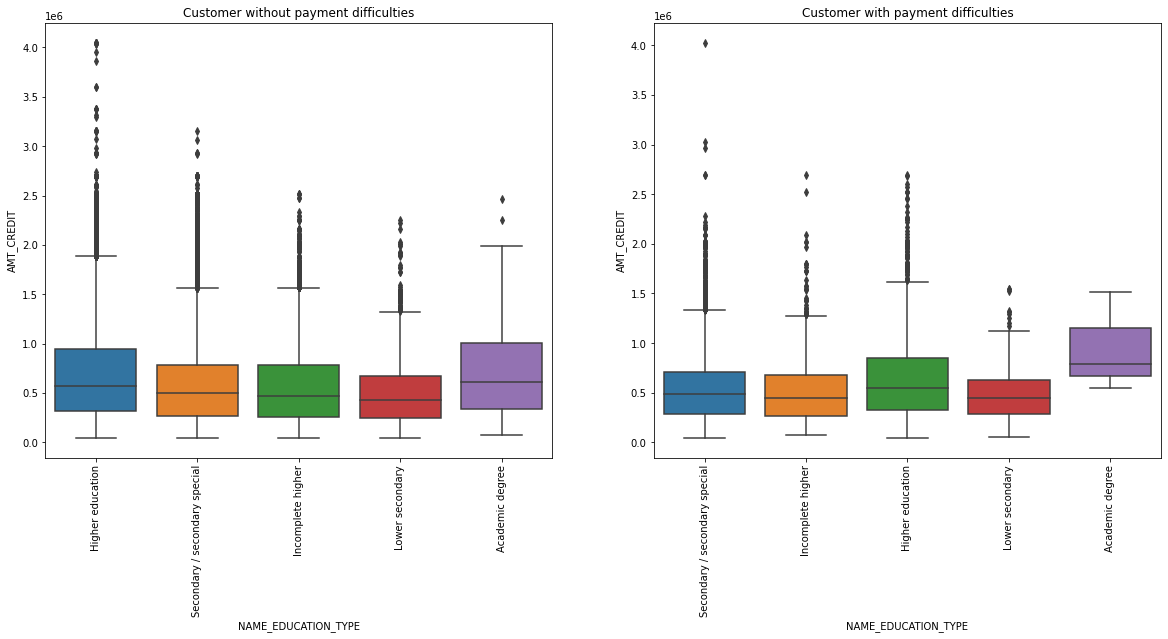

In [106]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=appli_data_target0,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=appli_data_target1,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

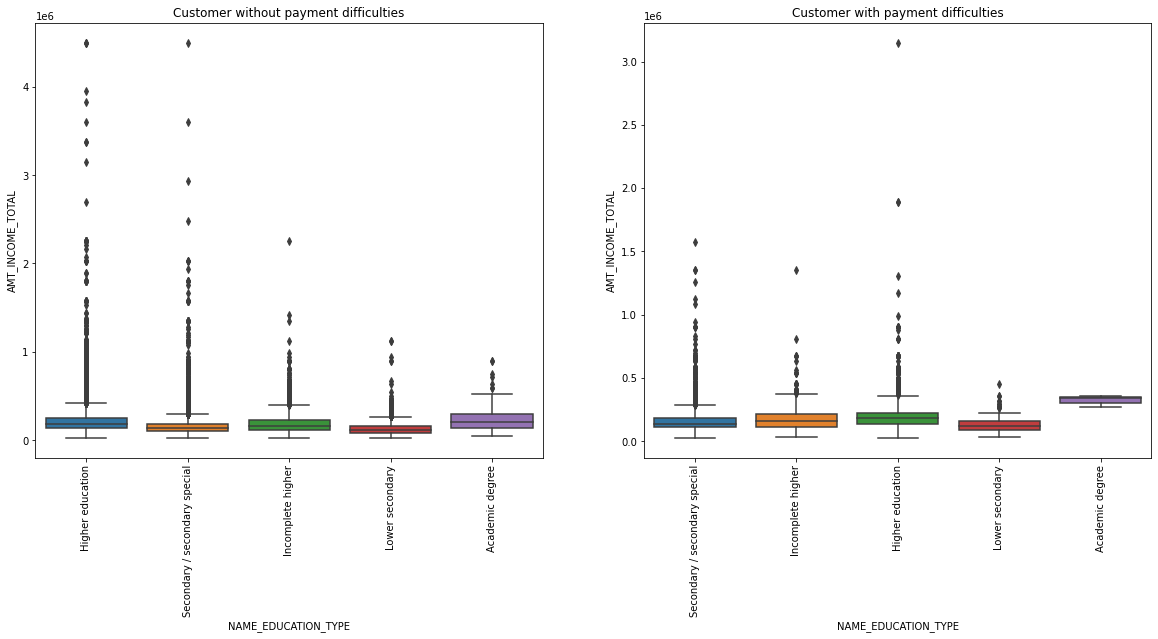

In [107]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=appli_data_target0[appli_data_target0['AMT_INCOME_TOTAL']<5000000],y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=appli_data_target1[appli_data_target1['AMT_INCOME_TOTAL']<5000000],y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

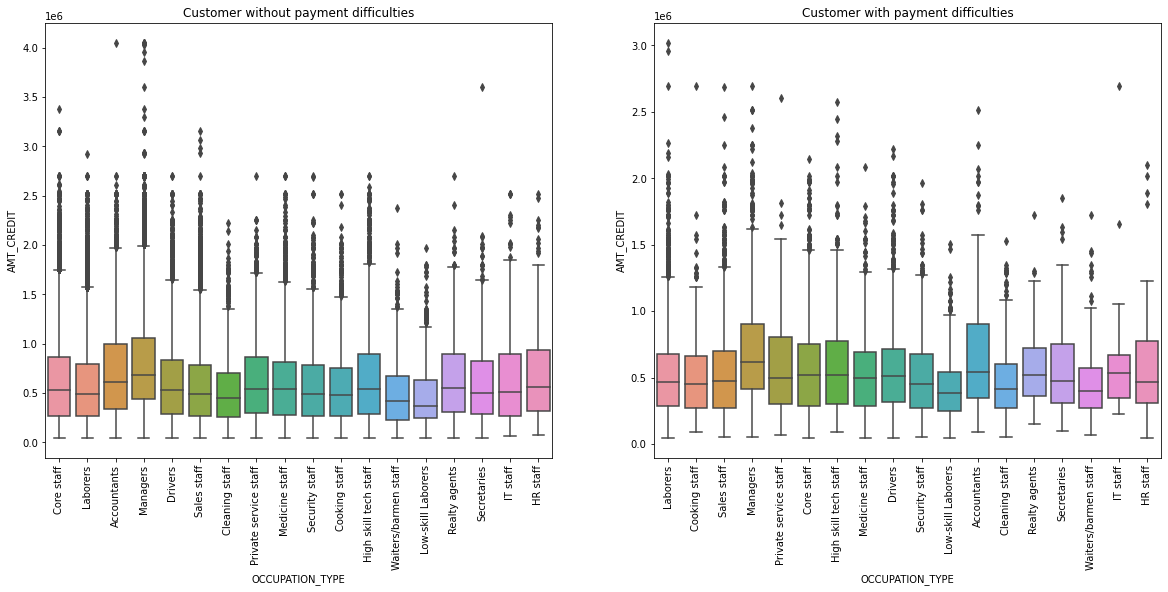

In [108]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=appli_data_target0,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=appli_data_target1,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

In [109]:
#Merging application_data_df and previous_application_df

In [110]:
#reading the previous application file
previous_application_df = pd.read_csv(r"C:\Users\shrey\Downloads\previous_application (1).csv")

In [111]:
previous_application_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
previous_application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [113]:
previous_application_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [114]:
#merging the application_data with previous application data
all_data_df = pd.merge(left=application_data, right=previous_application_df,how='inner', on='SK_ID_CURR',suffixes='_x')

In [115]:
all_data_df.shape

(1413701, 109)

In [116]:
all_data_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [ ]:
#conclusion
#banks should focus less on working and repair and more on Student ,pensioner and Businessman and with parents types